# Klasyfikator Decision Tree

Import niezbędnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from decision_regions import plot_decision_regions, plot_decision_regions1d
from sklearn.svm import SVC

In [2]:
# Wczytanie zbioru danych
dane = pd.read_csv('data.csv')

## Uwzględnienie wszystkich cech uczących: f0, formant1, formant2, formant3, formant4

Accuracy: 0.9833


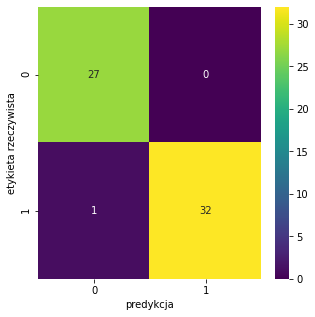

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



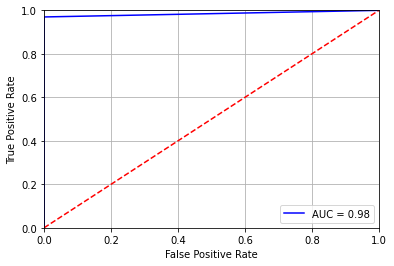

In [11]:
# Wszystkie cechy
X_dane = dane.iloc[:, 3:]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: f0 i formant1

Accuracy: 0.9833


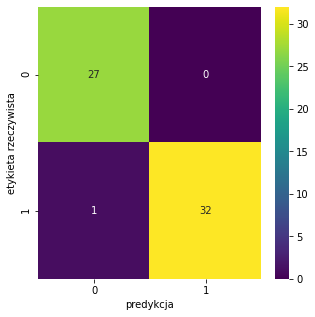

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



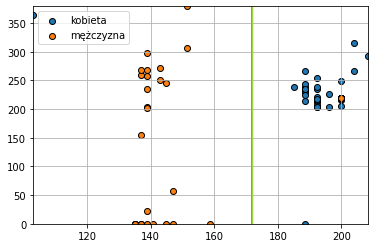

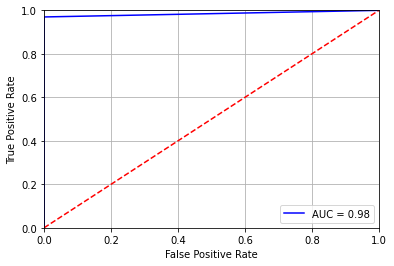

In [12]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [3,4]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# granica decyzyjna
ind1=np.where(y_test == 1)
ind2=np.where(y_test == 0)
plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

plot_decision_regions(X_test, y_test, clf)
plt.xlim(X_test[:,0].min(), X_test[:,0].max())
plt.ylim(X_test[:,1].min(), X_test[:,1].max())
plt.grid()
plt.legend()
plt.show()

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: f0 i formant2

Accuracy: 0.9833


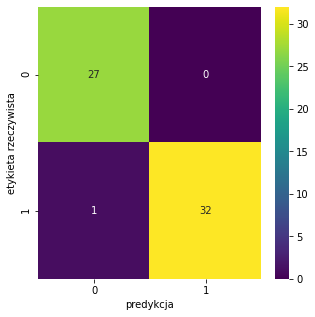

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



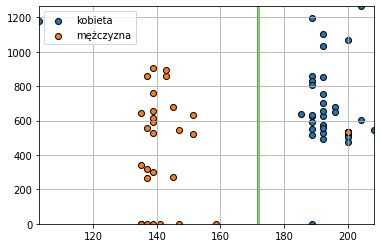

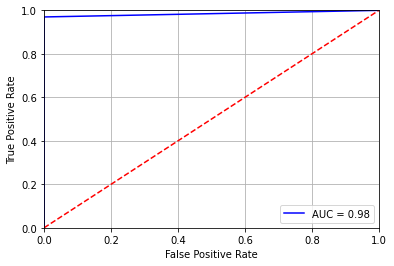

In [13]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [3,5]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# granica decyzyjna
ind1=np.where(y_test == 1)
ind2=np.where(y_test == 0)
plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

plot_decision_regions(X_test, y_test, clf)
plt.xlim(X_test[:,0].min(), X_test[:,0].max())
plt.ylim(X_test[:,1].min(), X_test[:,1].max())
plt.grid()
plt.legend()
plt.show()

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: f0 i formant3

Accuracy: 0.9833


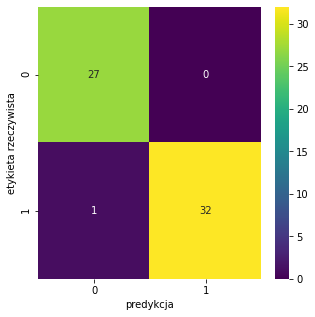

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



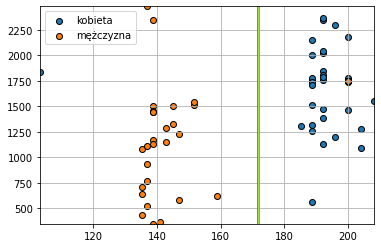

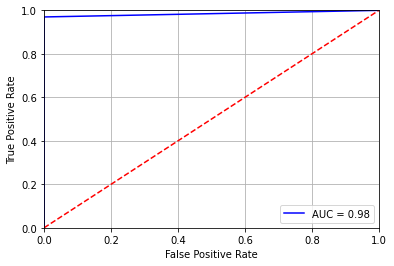

In [14]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [3,6]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# granica decyzyjna
ind1=np.where(y_test == 1)
ind2=np.where(y_test == 0)
plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

plot_decision_regions(X_test, y_test, clf)
plt.xlim(X_test[:,0].min(), X_test[:,0].max())
plt.ylim(X_test[:,1].min(), X_test[:,1].max())
plt.grid()
plt.legend()
plt.show()

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: f0 i formant4

Accuracy: 0.9833


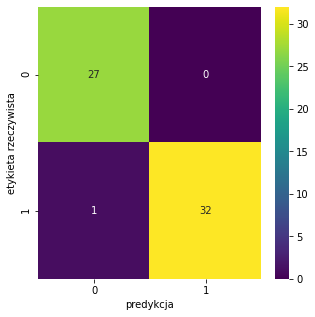

Macierz konfuzji:
[[27  0]
 [ 1 32]]
report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.98        33

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



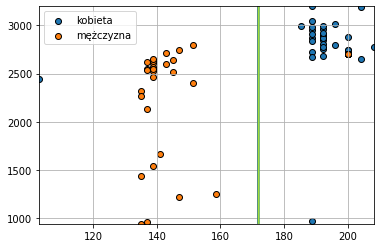

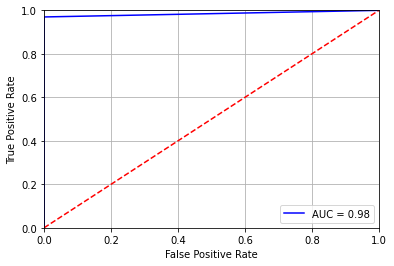

In [15]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [3,7]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# granica decyzyjna
ind1=np.where(y_test == 1)
ind2=np.where(y_test == 0)
plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

plot_decision_regions(X_test, y_test, clf)
plt.xlim(X_test[:,0].min(), X_test[:,0].max())
plt.ylim(X_test[:,1].min(), X_test[:,1].max())
plt.grid()
plt.legend()
plt.show()

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: formant1 i formant2

Accuracy: 0.7333


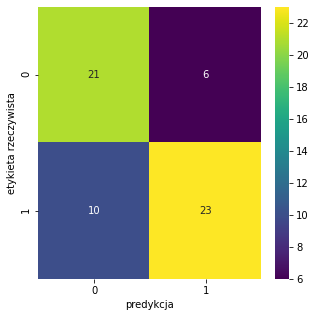

Macierz konfuzji:
[[21  6]
 [10 23]]
report
              precision    recall  f1-score   support

           0       0.68      0.78      0.72        27
           1       0.79      0.70      0.74        33

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



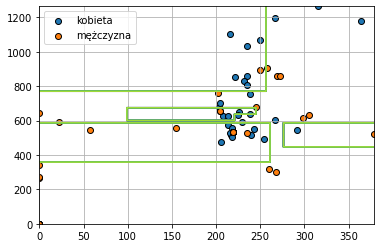

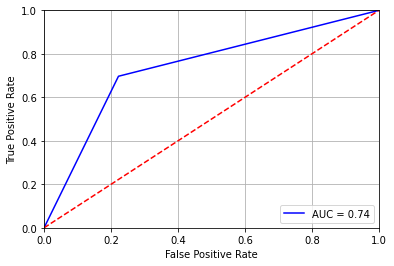

In [16]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [4,5]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# granica decyzyjna
ind1=np.where(y_test == 1)
ind2=np.where(y_test == 0)
plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

plot_decision_regions(X_test, y_test, clf)
plt.xlim(X_test[:,0].min(), X_test[:,0].max())
plt.ylim(X_test[:,1].min(), X_test[:,1].max())
plt.grid()
plt.legend()
plt.show()

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: formant1 i formant3

Accuracy: 0.7667


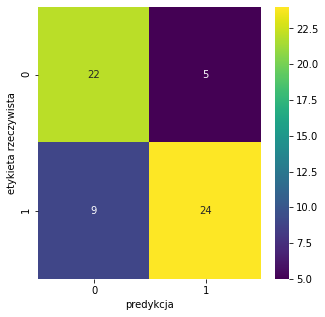

Macierz konfuzji:
[[22  5]
 [ 9 24]]
report
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.83      0.73      0.77        33

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



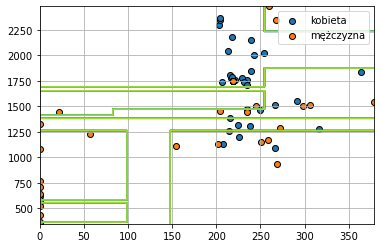

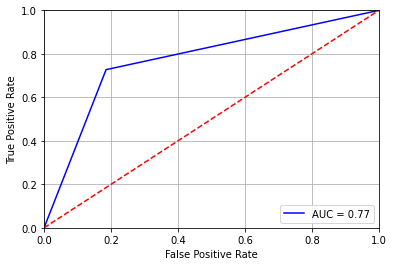

In [17]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [4,6]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# granica decyzyjna
ind1=np.where(y_test == 1)
ind2=np.where(y_test == 0)
plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

plot_decision_regions(X_test, y_test, clf)
plt.xlim(X_test[:,0].min(), X_test[:,0].max())
plt.ylim(X_test[:,1].min(), X_test[:,1].max())
plt.grid()
plt.legend()
plt.show()

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: formant1 i formant4

Accuracy: 0.8333


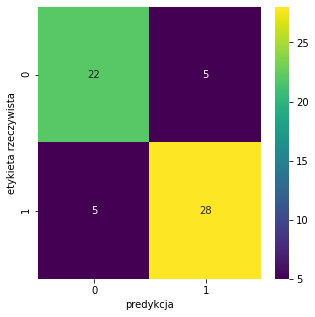

Macierz konfuzji:
[[22  5]
 [ 5 28]]
report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        33

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



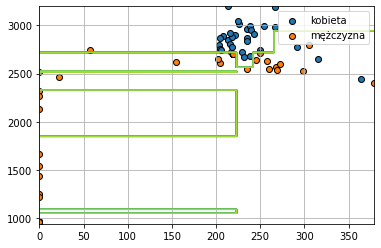

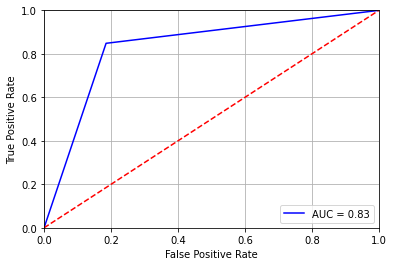

In [18]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [4,7]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# granica decyzyjna
ind1=np.where(y_test == 1)
ind2=np.where(y_test == 0)
plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

plot_decision_regions(X_test, y_test, clf)
plt.xlim(X_test[:,0].min(), X_test[:,0].max())
plt.ylim(X_test[:,1].min(), X_test[:,1].max())
plt.grid()
plt.legend()
plt.show()

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: formant2 i formant3

Accuracy: 0.7833


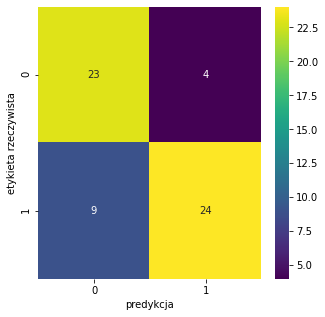

Macierz konfuzji:
[[23  4]
 [ 9 24]]
report
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.86      0.73      0.79        33

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



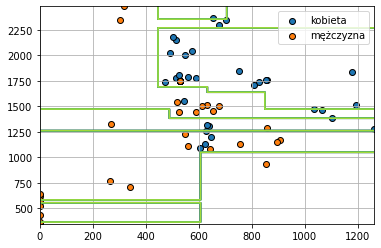

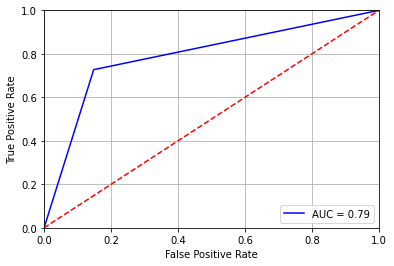

In [19]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [5,6]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# granica decyzyjna
ind1=np.where(y_test == 1)
ind2=np.where(y_test == 0)
plt.scatter(X_test[ind1,0], X_test[ind1,1], edgecolor='black', label='kobieta')
plt.scatter(X_test[ind2,0], X_test[ind2,1], edgecolor='black', label='mężczyzna')

plot_decision_regions(X_test, y_test, clf)
plt.xlim(X_test[:,0].min(), X_test[:,0].max())
plt.ylim(X_test[:,1].min(), X_test[:,1].max())
plt.grid()
plt.legend()
plt.show()

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: formant2 i formant4

Accuracy: 0.7167


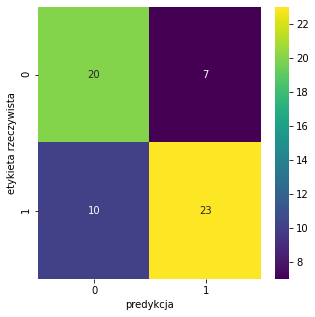

Macierz konfuzji:
[[20  7]
 [10 23]]
report
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.77      0.70      0.73        33

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



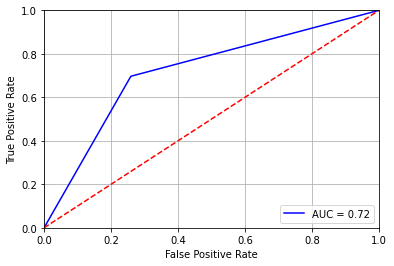

In [20]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [5,7]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Uwzględnienie 2 cech uczących: formant3 i formant4

Accuracy: 0.7667


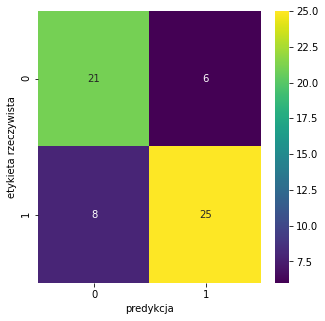

Macierz konfuzji:
[[21  6]
 [ 8 25]]
report
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.78        33

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



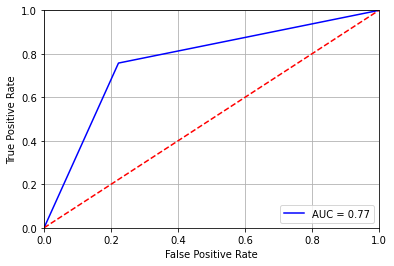

In [21]:
# 2 wybrane cechy
X_dane = dane.iloc[:, [6,7]]

X = np.array(X_dane)

# Klasa plec
y_dane = dane.iloc[:,[2]]
y = np.array(y_dane)

#Podzial na zbior uczacy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=42)

# Utworzenie modelu klasyfikatora
clf = tree.DecisionTreeClassifier()

# Uczenie klasyfikatora
clf = clf.fit(X_train, y_train)

# Predykcja
y_pred = clf.predict(X_test)

# Dokladnosc predykcji
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# Macierz konfuzji
plt.figure(figsize = (5, 5))
data = {'etykieta rzeczywista': y_test.ravel(), 'predykcja': y_pred.ravel()}
df = pd.DataFrame(data, columns=['etykieta rzeczywista', 'predykcja'])
confusion_mat = pd.crosstab(df['etykieta rzeczywista'], df['predykcja'], rownames=['etykieta rzeczywista'], colnames=['predykcja'])
sns.heatmap(confusion_mat, annot = True, cmap = "viridis")
plt.show()

# Macierz konfuzji
print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))
# Raport klasyfikacji
print('report')
print(classification_report(y_test, y_pred))

# rysowanie krzywej roc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Wnioski
Najwyższą dokładność klasyfikacji (98.3%) uzyskano po nauczeniu klasyfikatora Decision Tree z pełnym zbiorem cech, czyli f0, formant1, formant2, formant3, formant4 oraz z dwoma cechami, z których jedna była f0, a druga dowolnie wybranym formantem

In [27]:
slownik = {
    "f0, f1, f2, f3, f4" : [98.3],
    "f0 i f1" : [98.3],
    "f0 i f2" : [98.3],
    "f0 i f3" : [98.3],
    "f0 i f4" : [98.3],
    "f1 i f2" : [73.3],
    "f1 i f3" : [76.7],
    "f1 i f4" : [83.3],
    "f2 i f3" : [78.3],
    "f2 i f4" : [71.7],
    "f3 i f4" : [76.7]
}

tabela = pd.DataFrame.from_dict(slownik, orient='index')
print(tabela)

                       0
f0, f1, f2, f3, f4  98.3
f0 i f1             98.3
f0 i f2             98.3
f0 i f3             98.3
f0 i f4             98.3
f1 i f2             73.3
f1 i f3             76.7
f1 i f4             83.3
f2 i f3             78.3
f2 i f4             71.7
f3 i f4             76.7


Powyżej przedstawiono dokładności dla różnych zestawów cech uczących. Oprócz cechy f0, najwyższą dokładność otrzymano dla formantu1 i formantu4 (83.3 %)